# ANZ Virtual Internship Report- Task 1 & Task 2

## 1.0 Introduction

This is ANZ virtual internship. This internship comprised of two parts:

Task 1: Exploratory Data Analysis

Task 2: Predictive Analytics

## 2.0 Summary of Business Task

Task 1: Exploratory Data Analysis：
Segment the dataset and draw unique insignts, including visualisation of the transaction volume and assessing the effect of any outliers.

Task 2: Predictive Analytics：
Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

## 3.0 Description of All Data Sources Used

3.1 Source, Liscensing, Privacy：
The dataset is provided ANZ based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

License: N/A

Source: https://www.theforage.com/virtual-internships/prototype/ZLJCsrpkHo9pZBJNY/ANZ-Virtual-Internship?inv=8jeCcsp6NDcp4juED

Privacy: The dataset was generated from 100 hypothetical customers, hence no privacy issues involved.



# Task 1: Exploratory Data Analysis

## Imports and loading dataset 安装和加载数据

In [10]:
#Imports and loading dataset 
#安装和加载数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_excel("/Users/qianmeng/Downloads/ANZ synthesised transaction dataset.xlsx") #for job
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Data preparation
The dataset contains 12043 transactions for 100 customers who have one bank account each. Trasactional period
is from 01/08/2018 - 31/10/2018 (92 days duration). The data entries are unique and have consistent formats for
analysis. For each record/row, information is complete for majority of columns. Some columns contain missing
data (blank or NA cells), which is likely due to the nature of transaction. (i.e. merchants are not involved for
InterBank transfers or Salary payments) It is also noticed that there is only 91 unique dates in the dataset,
suggesting the transaction records for one day are missing (turned out to be 2018-08-16).
The range of each feature should also be examined which shows that there is one customer that resides outside
Australia

### The purpose of doing so is to

Make sure that each column feature is in its correct datatype (ex. date in datetime, age in integer etc..),otherwise, then we need to tranform the wrong datatype to the correct datatype. Locate missing values Gather & understand information in the datset. -> The dataset contains 12043 transactions for 100 customers who have one bank account each. -> Transaction period is from 01/08/2018-31/10/2018 (92 days duration)

-> The data entries are unique and have consistent formats for analysis.

-> For each row, information is complete for majority of columns. Some columns contain missing data, which is likely due to the nature of transaction (i.e merchants are not involved for Interbank transfer or salary payments)

-> It is also noticed that there is only 91 unique dates in the dataset, suggesting the transaction records for one day are missing (2018-08-16)

-> The range of each feature should also be examined which shows that there is one customer that resides outside Australia.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   balance            12043 non-null  float64       
 3   date               12043 non-null  datetime64[ns]
 4   gender             12043 non-null  object        
 5   age                12043 non-null  int64         
 6   merchant_suburb    7717 non-null   object        
 7   merchant_state     7717 non-null   object        
 8   amount             12043 non-null  float64       
 9   customer_id        12043 non-null  object        
 10  movement           12043 non-null  object        
 11  Months             12043 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 1.1+ MB


In [41]:
df.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


In [42]:
df.isnull().sum()

status                  0
card_present_flag    4326
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
amount                  0
customer_id             0
movement                0
Months                  0
dtype: int64

Cleaning or Manipulation of Data

In [43]:
#find rows which are all features(columns) are null 
df[df.isnull()]

#target on certain column
df[df['merchant_state'].isnull()]

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement,Months
5,posted,NaN,1705.43,2018-08-01,M,20,NaN,NaN,163.0,CUS-2688605418,debit,August
9,posted,NaN,466.58,2018-08-01,M,40,NaN,NaN,21.0,CUS-2031327464,debit,August
10,posted,NaN,4348.50,2018-08-01,M,19,NaN,NaN,27.0,CUS-2317998716,debit,August
11,posted,NaN,1203.75,2018-08-01,F,43,NaN,NaN,29.0,CUS-4123612273,debit,August
13,posted,NaN,4438.16,2018-08-01,M,23,NaN,NaN,25.0,CUS-1462656821,debit,August
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,13537.75,2018-10-31,M,27,NaN,NaN,67.0,CUS-3180318393,debit,October
12032,posted,NaN,20699.90,2018-10-31,F,19,NaN,NaN,33.0,CUS-883482547,debit,October
12035,posted,NaN,9349.51,2018-10-31,M,26,NaN,NaN,29.0,CUS-1646621553,debit,October
12036,posted,NaN,18127.50,2018-10-31,M,39,NaN,NaN,32.0,CUS-1790886359,debit,October


### Confirming 100 unique customers exist in dataset

In [13]:
# Confirming 100 unique customers exist in dataset
df["account"].nunique()

100

### Dropping irrelevant features
删除不相关功能

In [14]:
df = df[["status","card_present_flag","balance","date","gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
df["date"] = pd.to_datetime(df["date"])
df.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


## Exploratory Data Analysis
数据分析

### Total number of transactions made on each day

In [15]:
df["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

### Total number of transactions made by each customer

In [16]:
df["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

### Transaction volume each day


In [18]:
df_date_count = df.groupby("date").count()

In [19]:
trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)

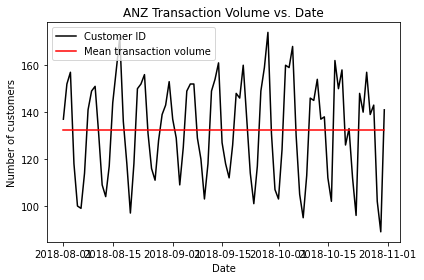

In [20]:
plt.figure()
plt.plot(df_date_count.index, df_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()

### Mean transaction amount each day

In [21]:
df_date_mean = df.groupby("date").mean()

In [22]:
trans_amt = df_date_mean["amount"].mean()
n_points = len(df_date_count.index)

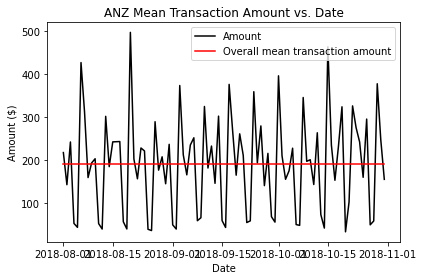

In [23]:
plt.figure()
plt.plot(df_date_count.index, df_date_mean["amount"], c="black", label = "Amount")
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [24]:
months = []
for date in df["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

df["Months"] = months
df["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

### Mean customer balance and payment amount by age 

In [25]:
df_cus_aug = df[df["Months"] == "August"].groupby("customer_id").mean()
df_gen_aug = df[df["Months"] == "August"].groupby("gender").mean()

In [26]:
mean_f_bal_aug = df_gen_aug["balance"].iloc[0]
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]
n_points = len(df_cus_aug["age"])

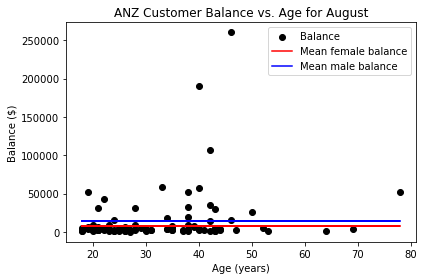

In [27]:
plt.figure()
plt.scatter(df_cus_aug["age"], df_cus_aug["balance"], c="black", label="Balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

ANZ Customer Mean Payment Amount vs Age for August

In [28]:
mean_f_amt_aug = df_gen_aug["amount"].iloc[0]
mean_m_amt_aug = df_gen_aug["amount"].iloc[1]

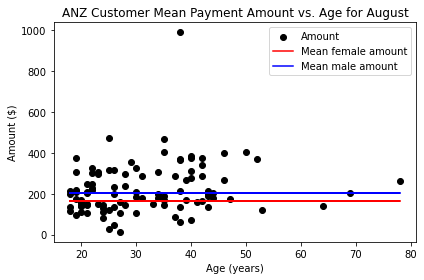

In [29]:
plt.scatter(df_cus_aug["age"], df_cus_aug["amount"], c="black", label="Amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [30]:
df_cus_sep = df[df["Months"] == "September"].groupby("customer_id").mean()
df_gen_sep = df[df["Months"] == "September"].groupby("gender").mean()

In [31]:
mean_f_bal_sep = df_gen_sep["balance"].iloc[0]
mean_m_bal_sep = df_gen_sep["balance"].iloc[1]
n_points = len(df_cus_sep["age"])

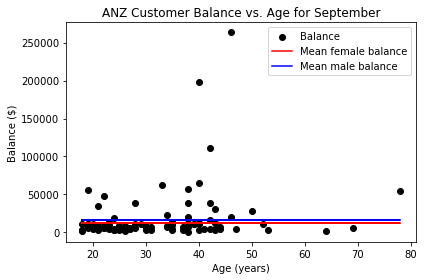

In [32]:
plt.figure()
plt.scatter(df_cus_sep["age"], df_cus_sep["balance"], c="black", label="Balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [33]:
mean_f_amt_sep = df_gen_sep["amount"].iloc[0]
mean_m_amt_sep = df_gen_sep["amount"].iloc[1]

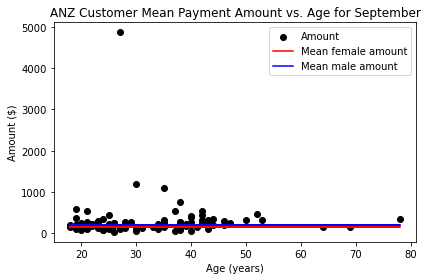

In [34]:
plt.scatter(df_cus_sep["age"], df_cus_sep["amount"], c="black", label="Amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_amt_sep,mean_f_amt_sep,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_amt_sep,mean_m_amt_sep,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [35]:
df_cus_oct = df[df["Months"] == "October"].groupby("customer_id").mean()
df_gen_oct = df[df["Months"] == "October"].groupby("gender").mean()

In [36]:
mean_f_bal_oct = df_gen_oct["balance"].iloc[0]
mean_m_bal_oct = df_gen_oct["balance"].iloc[1]
n_points = len(df_cus_oct["age"])

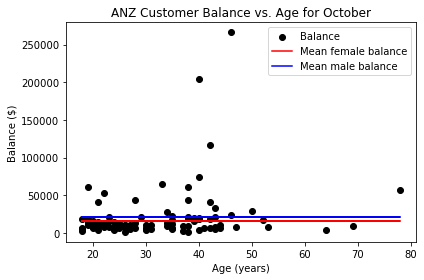

In [37]:
plt.figure()
plt.scatter(df_cus_oct["age"], df_cus_oct["balance"], c="black", label="Balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c="r", label = "Mean female balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [38]:
mean_f_amt_oct = df_gen_oct["amount"].iloc[0]
mean_m_amt_oct = df_gen_oct["amount"].iloc[1]

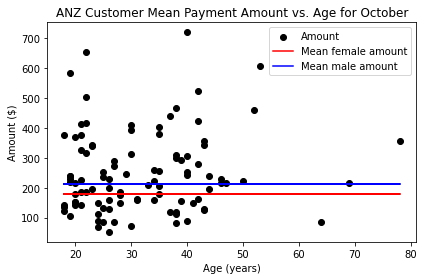

In [39]:
plt.scatter(df_cus_oct["age"], df_cus_oct["amount"], c="black", label="Amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_amt_oct,mean_f_amt_oct,n_points), c="r", label = "Mean female amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_amt_oct,mean_m_amt_oct,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

# Task 2: Predictive Analytics